In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-07-15_37_49/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

17001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

# Accuracy
accuracy = { k: v for k, v in enumerate(data["accuracy"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(math.trunc(float(current - previous))), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

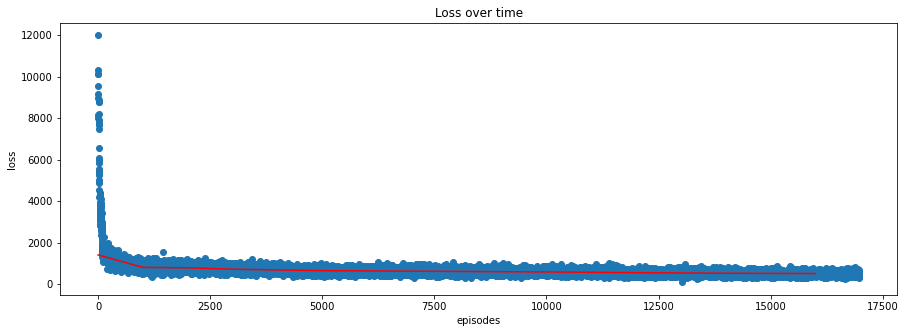

Maximum: 11992.7314453125
Average: 665.9993581063843
Moving Average: ['-42% (-599 | -42%)', '-2% (-20 | -44%)', '-8% (-66 | -48%)', '-5% (-36 | -51%)', '-4% (-34 | -53%)', '-1% (-12 | -54%)', '-2% (-14 | -55%)', '-1% (-9 | -56%)', '-2% (-15 | -57%)', '-1% (-10 | -58%)', '-2% (-16 | -59%)', '-3% (-20 | -60%)', '-2% (-12 | -61%)', '-2% (-14 | -62%)', '-1% (-6 | -63%)', '-1% (-5 | -63%)']
Minimum: 80.62081146240234


In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

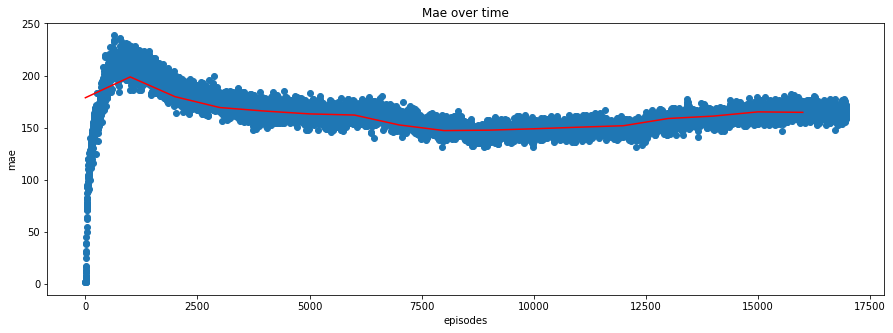

Maximum: 238.51803588867188
Average: 162.69467779236837
Moving Average: ['+11% (19 | 11%)', '-9% (-18 | 0%)', '-5% (-10 | -5%)', '-1% (-3 | -7%)', '-1% (-2 | -8%)', '0% (-1 | -9%)', '-5% (-9 | -14%)', '-3% (-5 | -17%)', '+0% (0 | -17%)', '+0% (1 | -16%)', '+1% (1 | -15%)', '+0% (1 | -15%)', '+4% (6 | -11%)', '+1% (2 | -9%)', '+2% (4 | -7%)', '0% (0 | -7%)']
Minimum: 1.571179986000061


In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

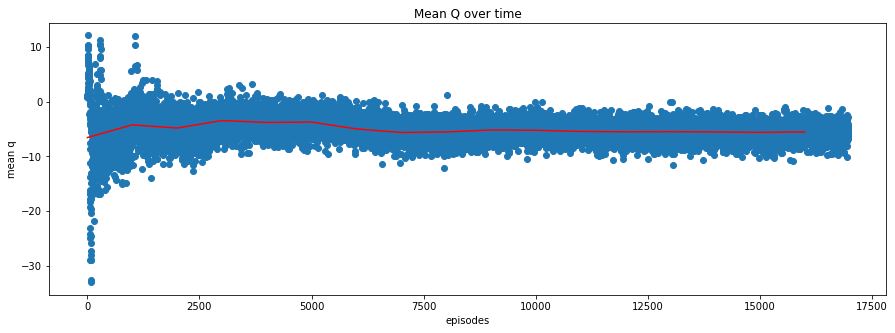

Maximum: 12.152837753295898
Average: -5.047885354459451
Moving Average: []
Minimum: -33.03105163574219


In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

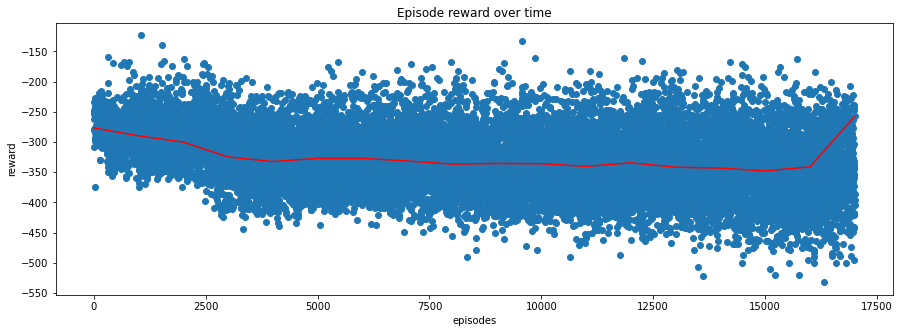

Maximum: -123.4
Average: -327.3192988647701
Moving Average: []
Minimum: -532.4


In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

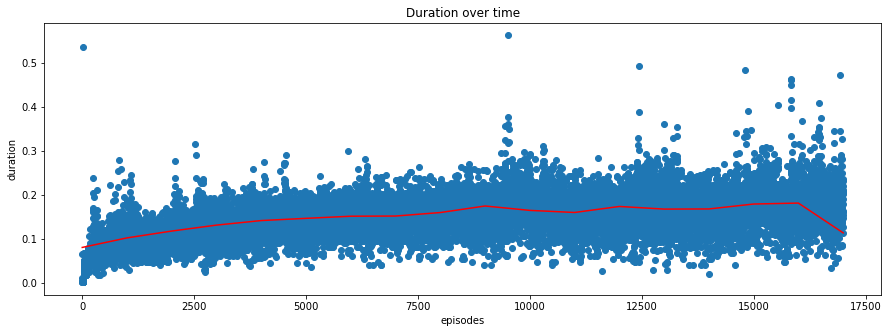

Maximum: 0.5616205999999693
Average: 0.15045032945709125
Moving Average: ['+26% (0 | 26%)', '+15% (0 | 45%)', '+11% (0 | 62%)', '+7% (0 | 75%)', '+3% (0 | 81%)', '+3% (0 | 87%)', '+0% (0 | 87%)', '+5% (0 | 97%)', '+9% (0 | 115%)', '-5% (0 | 103%)', '-2% (0 | 97%)', '+8% (0 | 114%)', '-3% (0 | 107%)', '+0% (0 | 107%)', '+6% (0 | 121%)', '+1% (0 | 124%)', '-37% (0 | 40%)']
Minimum: 0.001692600000000155


In [9]:
plot(duration, "Duration over time", "episodes", "duration")

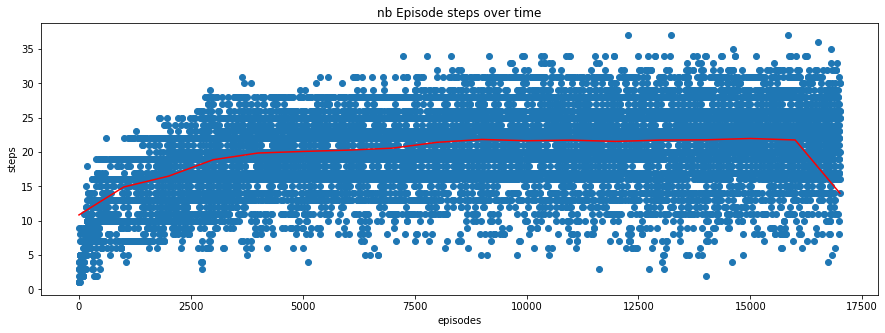

Maximum: 37
Average: 19.843009234750898
Moving Average: ['+37% (4 | 37%)', '+10% (1 | 52%)', '+14% (2 | 74%)', '+5% (0 | 83%)', '+1% (0 | 85%)', '+0% (0 | 87%)', '+1% (0 | 89%)', '+4% (0 | 97%)', '+1% (0 | 101%)', '0% (0 | 99%)', '+0% (0 | 100%)', '0% (0 | 98%)', '+0% (0 | 100%)', '+0% (0 | 100%)', '+0% (0 | 102%)', '0% (0 | 100%)', '-35% (-7 | 29%)']
Minimum: 1


In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

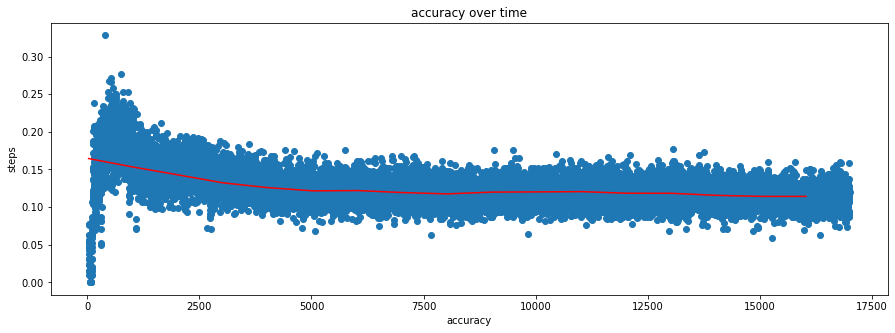

Maximum: 0.328125
Average: 0.12597921319807884
Moving Average: ['-6% (0 | -6%)', '-6% (0 | -13%)', '-7% (0 | -19%)', '-4% (0 | -23%)', '-3% (0 | -26%)', '+0% (0 | -25%)', '-2% (0 | -27%)', '-1% (0 | -28%)', '+2% (0 | -27%)', '+0% (0 | -26%)', '+0% (0 | -26%)', '-1% (0 | -27%)', '0% (0 | -28%)', '-2% (0 | -29%)', '-1% (0 | -30%)', '+0% (0 | -30%)']
Minimum: 0.0


In [11]:
plot(accuracy, "accuracy over time", "accuracy", "steps")